In [5]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

GENRES = {'metal':(113,97,112), 'disco':(255,165,0), 'classical':(235,195,10), 'hiphop':(0,0,139), 'jazz':(255,192,203),
          'country':(165,42,42), 'pop':(135,206,235), 'blues':(0,0,225), 'reggae':(0,128,0), 'rock':(220,20,60)}
SAMPLE_SIZE = 660000
song = "D:\OneDrive - gm.ntpu.edu.tw\三上\嵌入式系統導論\Term Project\Mi Gente.mp3"

In [17]:
def split_song(signal):
    y = []
    window_size = int(signal.shape[0] * 0.1)
    y.append(signal[1:window_size])
    return np.array(y)

def generate_spectrograms(signals):
    rep = []
    for instance in signals:
            rep.append(librosa.feature.melspectrogram(instance))
    return np.array(rep)

In [18]:
signal, sr = librosa.load(song)
middle_sample = int(len(signal)/SAMPLE_SIZE/2)
middle_part = signal[middle_sample * SAMPLE_SIZE: (middle_sample+1) * SAMPLE_SIZE]
window = split_song(middle_part)
middle_spectr = generate_spectrograms(window)

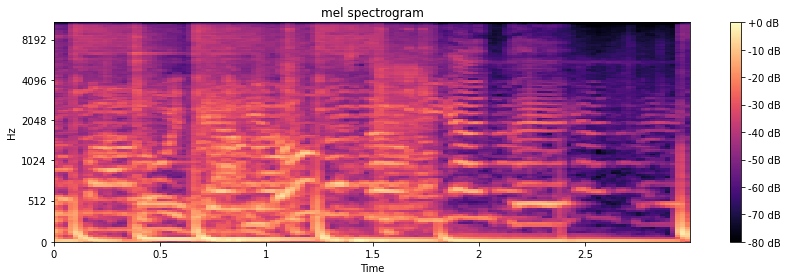

In [25]:
S = librosa.feature.melspectrogram(window[0])
M_db = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(M_db, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

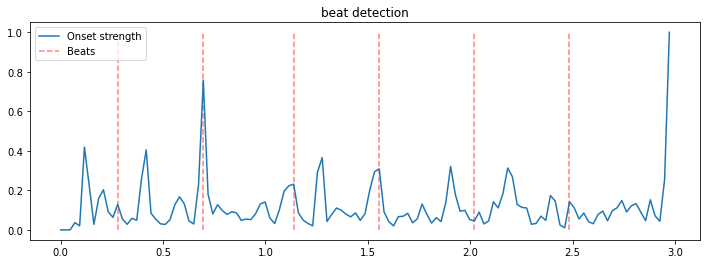

In [31]:
onset_env = librosa.onset.onset_strength(y=window[0], sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)
tempo, beats = librosa.beat.beat_track(y=window[0], tightness=100)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
fig, ax = plt.subplots(figsize=(12,4), nrows=1, sharex=True, sharey=True)

times = librosa.times_like(onset_env, sr=sr)
ax.plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax.vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax.legend()
ax.set(title='beat detection')
ax.label_outer()